In [48]:
import os
import itertools as it
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.weightstats import ttest_ind

plotname = "multihidden"
#plotname = "neat"

dfname = "stockfish_eval.csv" if plotname.endswith("hidden") else "stockfish_eval_neat.csv"
df = pd.read_csv(f"./evaluation/{dfname}").sort_values(by=["generation","best_player_idx"])

In [49]:
# filtering for the first architecture only
if dfname == "stockfish_eval.csv":
    arch = 64
    df = df[df.nodes == arch]
df[df.generation==50]

,stockfish_elo,stockfish_time_lim,trials,popsize,nodes,n_matches,max_depth,time_lim,weights_init,generation,best_player_idx,win,draw,loss,w_count,b_count,overall
130,400,50,6,16,64,3,4,3000,unixavier,50,0,0,0,6,42,101,143
134,400,50,6,16,64,3,4,3000,unixavier,50,1,1,1,4,56,116,172
137,400,50,6,16,64,3,4,3000,unixavier,50,2,0,0,6,40,66,106
142,400,50,6,16,64,3,4,3000,unixavier,50,3,0,1,5,41,130,171
149,400,50,6,16,64,3,4,3000,unixavier,50,4,0,1,5,58,121,179
154,400,50,6,16,64,3,4,3000,unixavier,50,5,0,0,6,43,97,140
159,400,50,6,16,64,3,4,3000,unixavier,50,6,0,0,6,48,138,186
163,400,50,6,16,64,3,4,3000,unixavier,50,7,0,0,6,52,133,185
168,400,50,6,16,64,3,4,3000,unixavier,50,8,0,1,5,64,75,139
173,400,50,6,16,64,3,4,3000,unixavier,50,9,0,0,6,34,88,122


In [50]:
# Estimating the number of win/draw/lose
print("Percentage of individuals across generations that lose all matches:   ", df[df.loss == df.trials].shape[0] / df.shape[0])
print("Percentage of individuals across generations that draw at least once: ", df[df.draw != 0].shape[0] / df.shape[0])
print("Percentage of individuals across generations that won at least once:  ", df[df.win != 0].shape[0] / df.shape[0])
lo = df[df.loss == df.trials]

Percentage of individuals across generations that lose all matches:    0.8203125
Percentage of individuals across generations that draw at least once:  0.171875
Percentage of individuals across generations that won at least once:   0.015625


In [51]:
def estimate_percentage_outcome(df):
    re = []
    for i,g in enumerate(df.generation.unique()):
        
        tmp = df[df.generation==g]
        n_trials = tmp.trials.unique()[0]
        n_individuals = tmp.shape[0]
        tot_n_match = n_trials * n_individuals
        
        p_loss = tmp.loss.sum() / tot_n_match
        p_draw = tmp.draw.sum() / tot_n_match
        p_win  = tmp.win.sum() / tot_n_match
        
        #p_loss = df[(df.generation==g) & (df.loss==df.trials)].shape[0] / df[(df.generation==g)].shape[0]
        #p_draw = df[(df.generation==g) & (df.draw!=0)].shape[0] / df[(df.generation==g)].shape[0]
        #p_win  = df[(df.generation==g) & (df.win!=0)].shape[0] / df[(df.generation==g)].shape[0]
        
        if dfname == "stockfish_eval.csv":
            re.append(pd.DataFrame({"gen":g, "arch":arch, "p_loss":p_loss, "p_draw":p_draw, "p_win":p_win}, index = [i]))
        else:
            re.append(pd.DataFrame({"gen":g, "p_loss":p_loss, "p_draw":p_draw, "p_win":p_win}, index = [i]))

    return pd.concat(re)

In [52]:
estimate_percentage_outcome(df)

,gen,arch,p_loss,p_draw,p_win
0,25,64,0.968750,0.031250,0.000000
1,50,64,0.937500,0.052083,0.010417
2,75,64,0.968750,0.020833,0.010417
3,100,64,0.968750,0.031250,0.000000
4,125,64,0.947917,0.052083,0.000000
5,150,64,0.958333,0.041667,0.000000
6,175,64,1.000000,0.000000,0.000000
7,200,64,0.989583,0.010417,0.000000


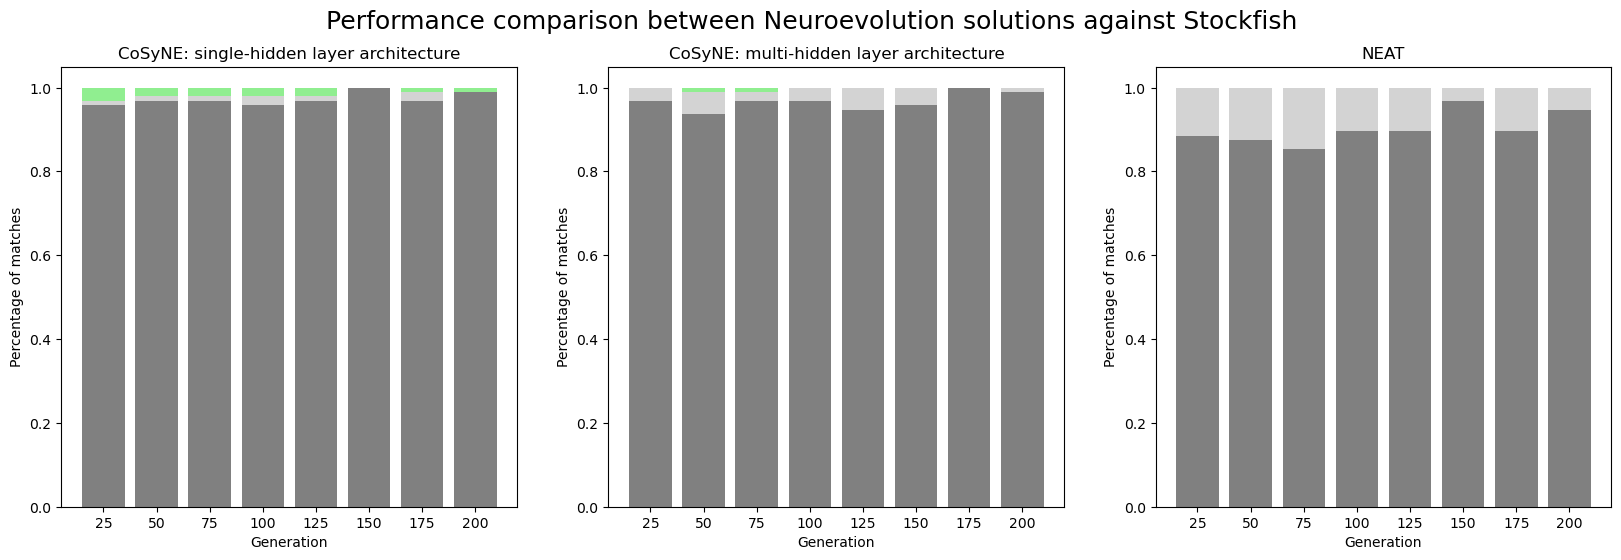

In [31]:
# Histogram
plt.figure(figsize=(20, 20/3.5))
plt.suptitle("Performance comparison between Neuroevolution solutions against Stockfish", fontsize=18)

def load_df(plotname):
    dfname = "stockfish_eval.csv" if plotname.lower() == "cosyne" else "stockfish_eval_neat.csv"
    return pd.read_csv(f"./evaluation/{dfname}").sort_values(by=["generation","best_player_idx"])

for i in range(3):
    
    if i == 0:
        df = load_df("CoSyNE")
        df = df[df.nodes == 128]
    elif i == 1:
        df = load_df("CoSyNE")
        df = df[df.nodes == 64]
    elif i == 2:
        df = load_df("NEAT")
        
    re = estimate_percentage_outcome(df)
    ax = plt.subplot(1,3,i+1)
    ax.set_title("CoSyNE: single-hidden layer architecture" if i==0 else \
                "CoSyNE: multi-hidden layer architecture" if i==1 else \
                "NEAT")

    plt.bar(re.index, re.p_loss + re.p_draw + re.p_win, color = "lightgreen")
    plt.bar(re.index, re.p_loss + re.p_draw, color = "lightgray")
    plt.bar(re.index, re.p_loss, color = "gray")
    plt.xticks(range(0, re.shape[0]), [str(g) for g in lo.generation.unique()])
    plt.xlabel("Generation")
    plt.ylabel("Percentage of matches")

plt.savefig(f"performance_comparison_all.png")
plt.show()

In [53]:
# Generating each valid combination
comb = list(it.product(df.generation.unique(),df.generation.unique() ))
comb = [(item[0],item[1]) for item in comb if item[1]>item[0]]

In [54]:
# Comparing overall number of moves before being defeated by Stockfish (Across generations) 
re = []
for i,pair in enumerate(comb):
    counters = dict()
    for countvar in ["w_count", "b_count", "overall"]:
        x1 = lo[lo.generation==pair[0]][countvar]
        x2 = lo[lo.generation==pair[1]][countvar]
        tmp = ttest_ind(x1, x2, alternative='larger', usevar='pooled', weights=(None, None), value=0)      
        counters[countvar] = tmp
    re.append(pd.DataFrame({"g1":pair[0], "g2":pair[1],
                            "tstat_w":counters["w_count"][0], "pval_w":counters["w_count"][1],
                            "tstat_b":counters["b_count"][0], "pval_b":counters["b_count"][1],
                            "tstat_ov":counters["overall"][0],"pval_ov":counters["overall"][1],}, index=[i]))
    
re = pd.concat(re)

In [55]:
alpha = 0.05
re[(re.pval_w<alpha) | (re.pval_b<alpha) | (re.pval_ov<alpha)]

,g1,g2,tstat_w,pval_w,tstat_b,pval_b,tstat_ov,pval_ov


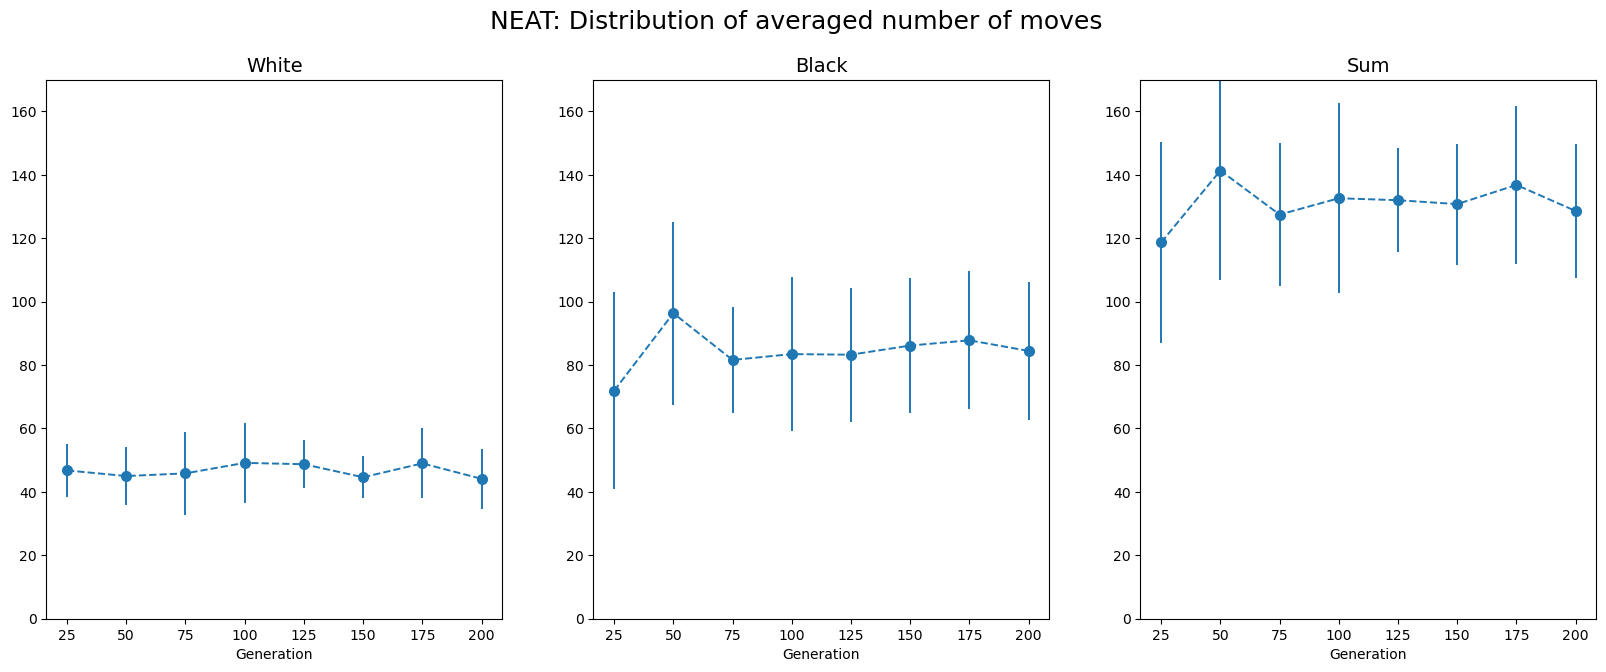

In [56]:
# Plotting
plt.figure(figsize=(20,7))
plt.suptitle("NEAT: Distribution of averaged number of moves", fontsize=18)

for i, name in enumerate(["w_count", "b_count", "overall"]):
    c = "gray" if name == "w_count" else "black" if name == "b_count" else "blue"
    ax = plt.subplot(1,3,i+1)
    x = lo.groupby("generation")[name].mean().values
    yerr = lo.groupby("generation")[name].std().values
    
    plt.errorbar(range(0, x.shape[0]), x, yerr=yerr,  marker='o', linestyle='dashed', linewidth=1.4, markersize=7)
    plt.xticks(range(0, x.shape[0]), [str(g) for g in lo.generation.unique()])
    plt.xlabel("Generation")
    plt.ylim((0,170))
    plt.title("White" if name=="w_count" else "Black" if name=="b_count" else "Sum", fontsize=14)
plt.savefig(f"distr_avg_nofmoves_{plotname}.png")
plt.show()

In [59]:
# Comparing between w moves and b moves across generations
def estimate_wb_test(lo):
    """ lo: player that lost all matches dataframe """
    re = []
    for i,gen in enumerate(lo.generation.unique()):
        x1 = lo[lo.generation==gen]["w_count"]
        x2 = lo[lo.generation==gen]["b_count"]
        tmp = ttest_ind(x1, x2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0)      
        re.append(pd.DataFrame({"gen":gen,
                                "tstat":tmp[0], "pval":tmp[1],
                               }, index=[i]))
    return(pd.concat(re))


In [65]:
estimate_wb_test(lo)

,gen,tstat,pval
0,25,-1.189606,0.268307
1,50,-2.183396,0.046525
2,75,-1.871521,0.085843
3,100,-2.220920,0.041140
4,125,-5.256408,0.000121
5,150,-1.889826,0.070919
6,175,-0.859338,0.402846
7,200,-4.575901,0.000183


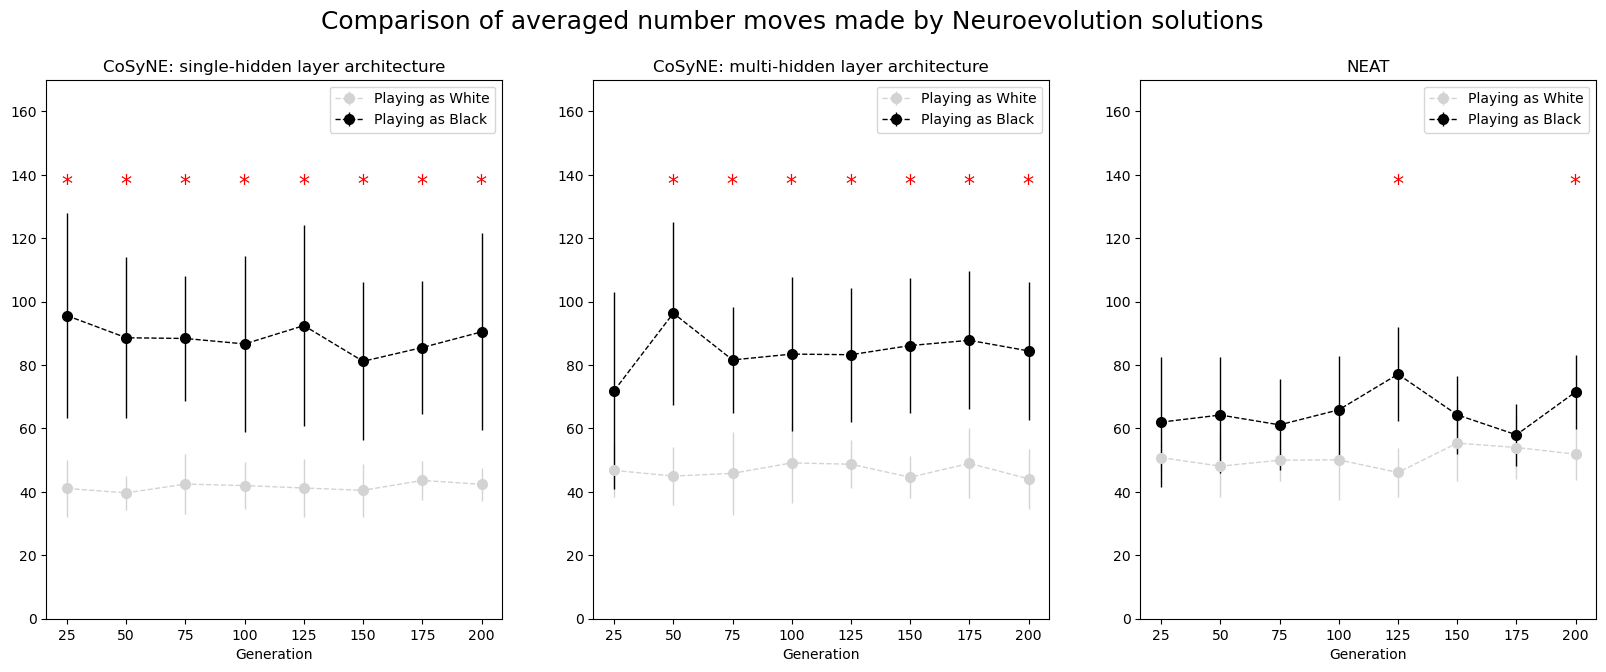

In [29]:
# Plotting
plt.figure(figsize=(20,7))
plt.suptitle("Comparison of averaged number moves made by Neuroevolution solutions ", fontsize=18)
    
def load_df(plotname):
    dfname = "stockfish_eval.csv" if plotname.lower() == "cosyne" else "stockfish_eval_neat.csv"
    df = pd.read_csv(f"./evaluation/{dfname}").sort_values(by=["generation","best_player_idx"])
    return df[df.loss == df.trials]

def estimate_wb_test(lo):
    """ lo: player that lost all matches dataframe """
    re = []
    for i,gen in enumerate(lo.generation.unique()):
        x1 = lo[lo.generation==gen]["w_count"]
        x2 = lo[lo.generation==gen]["b_count"]
        tmp = ttest_ind(x1, x2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0)      
        re.append(pd.DataFrame({"gen":gen,
                                "tstat":tmp[0], "pval":tmp[1],
                               }, index=[i]))
    return(pd.concat(re))

for i in range(3):
    
    if i == 0:
        df = load_df("CoSyNE")
        df = df[df.nodes == 128]
    elif i == 1:
        df = load_df("CoSyNE")
        df = df[df.nodes == 64]
    elif i == 2:
        df = load_df("NEAT")
        
    ax = plt.subplot(1,3,i+1)
    ax.set_title("CoSyNE: single-hidden layer architecture" if i==0 else \
                "CoSyNE: multi-hidden layer architecture" if i==1 else \
                "NEAT")
    sign = estimate_wb_test(df).pval<(0.05/estimate_wb_test(df).shape[0])
    
    name = "w_count"
    x = df.groupby("generation")[name].mean().values
    yerr = df.groupby("generation")[name].std().values
    c = "lightgray" if name == "w_count" else "black" if name == "b_count" else "blue"
    plt.errorbar(range(0, x.shape[0]), x, yerr=yerr,  marker='o', linestyle='dashed', linewidth=1, markersize=7, color = c, label="Playing as White")

    name = "b_count"
    x = df.groupby("generation")[name].mean().values
    yerr = df.groupby("generation")[name].std().values
    c = "lightgray" if name == "w_count" else "black" if name == "b_count" else "blue"
    plt.errorbar(range(0, x.shape[0]), x, yerr=yerr,  marker='o', linestyle='dashed', linewidth=1, markersize=7, color = c, label="Playing as Black")

    for i,s in enumerate(sign):
        if s:
            plt.annotate("*", (i,135.0), (i-0.1,135.0) ,color = "red", fontsize=16)
    
    plt.xticks(range(0, x.shape[0]), [str(g) for g in lo.generation.unique()])
    plt.xlabel("Generation")
    plt.legend()
    plt.ylim((0,170))
    
plt.savefig(f"distr_avg_nofmoves_all.png")
plt.show()